In [1]:
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import os
from subprocess import check_output

# 1. 데이터 불러오기

In [2]:
usvideos=pd.read_csv("USvideos.csv")

In [3]:
usvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
usvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
usvideos.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [6]:
usvideos.describe(include=[np.object])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,18.16.04,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


# 2. 데이터 살펴보기, 전처리

In [7]:
usvideos['comments_disabled'].value_counts()

False    40316
True       633
Name: comments_disabled, dtype: int64

In [8]:
usvideos['ratings_disabled'].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64

In [9]:
usvideos['video_error_or_removed'].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64

views, likes, dislikes, comment_count 간의 관계를 이용하여 분석할 예정이므로 comments_disabled, ratings_disabled, video_error_or_removed가 True인 관측치는 제외한다. 

In [3]:
filter = (usvideos['comments_disabled'] == 'False') & (usvideos['ratings_disabled'] == 'False') & (usvideos['video_error_or_removed'] == 'False')
usvideos_new = usvideos.loc[filter]

In [4]:
us_new = usvideos.loc[:,usvideos_new.columns.isin(['video_id', 'category_id','views','likes','dislikes','comment_count'])]

In [5]:
us_new.head()

,video_id,category_id,views,likes,dislikes,comment_count
0,2kyS6SvSYSE,22,748374,57527,2966,15954
1,1ZAPwfrtAFY,24,2418783,97185,6146,12703
2,5qpjK5DgCt4,23,3191434,146033,5339,8181
3,puqaWrEC7tY,24,343168,10172,666,2146
4,d380meD0W0M,24,2095731,132235,1989,17518


In [6]:
us_new.shape

(40949, 6)

### video_id

In [7]:
us_new["video_id"].value_counts()

j4KvrAUjn6c    30
8h--kFui1JA    29
MAjY8mCTXWk    29
QBL8IRJ5yHU    29
r-3iathMo7o    29
               ..
P4YJwy_T9pM     1
Y6eKxjMA9ek     1
PozbOaVdPp0     1
rxUfRhVYeKI     1
y86ymJNswlE     1
Name: video_id, Length: 6351, dtype: int64

특정 video_id가 많이 관측된것을 보면 특정 영상이 trending video에 오랫동안 올라와있었다는 것을 알 수 있다. 

In [8]:
filter=usvideos["video_id"]=="j4KvrAUjn6c"
usvideos.loc[filter]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
34550,j4KvrAUjn6c,18.14.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,4696,10705,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! TIX ON SALE NOW!! https://www.d...
34752,j4KvrAUjn6c,18.15.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
34901,j4KvrAUjn6c,18.15.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
34966,j4KvrAUjn6c,18.16.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",4862649,90451,14792,18035,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
35180,j4KvrAUjn6c,18.17.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",5665445,101461,16170,19395,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
35396,j4KvrAUjn6c,18.18.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",6290796,110373,17131,20365,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
35600,j4KvrAUjn6c,18.19.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",6773604,116508,17787,20941,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
35804,j4KvrAUjn6c,18.20.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",7204004,121673,18323,21459,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
36035,j4KvrAUjn6c,18.21.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",7512530,125317,18633,21812,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
36245,j4KvrAUjn6c,18.22.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",7740671,128377,18901,22052,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...


가장 오랫동안 trending video에 있었던 영상은 Lucas ans Marcus 채널의 _WE MADE OUR MOM CRY...HER DREAM CAME TRUE!_ 라는 영상이고 18년 5월 14일부터 18년 6월 11일까지 30일간 trending video에 있었다.  

### category_id

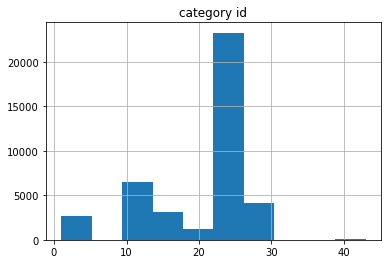

In [55]:
us_new["category_id"].hist()
plt.title("category id")
plt.show()

이 데이터는 category id가 특정 값에 몰려있다. 

In [51]:
us_new["category_id"].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

가장 많이 등장하는 카테고리는 순서대로 Entertainment(24), Music(10), Howto&Style(26) 이고   
가장 적게 등장하는 카테고리는 Shows(43), Nonprofits&Activism(29) 이다. 

### views

<AxesSubplot:>

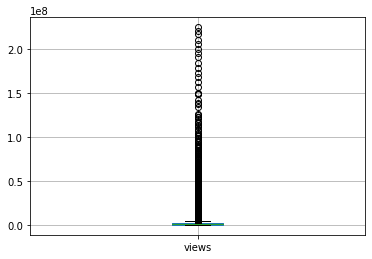

In [56]:
us_new.boxplot(column=['views'])

outlier 제거

-2128913.0 4194399.0
original size :  40949
new size :  36450


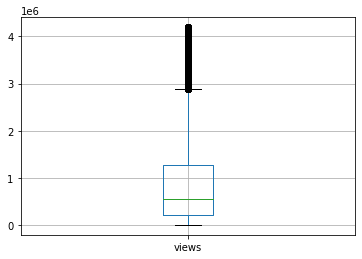

In [57]:
Q1 = us_new['views'].quantile(0.25)
Q3 = us_new['views'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (us_new['views'] >= Q1 - 1.5 * IQR) & (us_new['views'] <= Q3 + 1.5 *IQR)
print(Q1 - 1.5 * IQR,Q3 + 1.5 *IQR)

filter = (us_new['views'] <= Q3 + 1.5 *IQR)
us_new1 = us_new.loc[filter]
us_new1.boxplot(column=['views'])

print("original size : ",len(us_new['views']))
print("new size : ",len(us_new1['views']))

### likes

<AxesSubplot:>

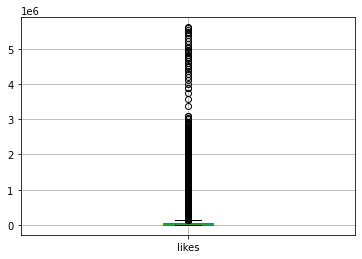

In [74]:
us_new.boxplot(column=['likes'])

-69565.5 130406.5
original size :  40949
new size :  40050  ->'likes'는 outlier가 많아 outlier 제거하면 data가 꽤 작아짐.


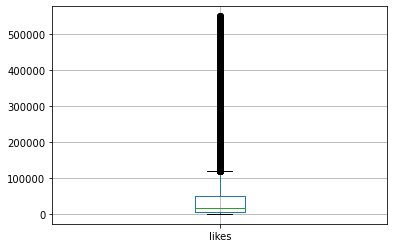

In [59]:
Q1 = us_new['likes'].quantile(0.25)
Q3 = us_new['likes'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (us_new['likes'] >= Q1 - 1.5 * IQR) & (us_new['likes'] <= Q3 + 1.5 *IQR)
print(Q1 - 1.5 * IQR,Q3 + 1.5 *IQR)

filter = (us_new['likes'] <= Q3 + 1.5 *IQR)
filter = (us_new['likes'] <= 550000)
us_new2 = us_new.loc[filter]
us_new2.boxplot(column=['likes'])

print("original size : ",len(us_new['likes']))
print("new size : ",len(us_new2['likes'])," ->'likes'는 outlier가 많아 outlier 제거하면 data가 꽤 작아짐.")

### dislikes

<AxesSubplot:>

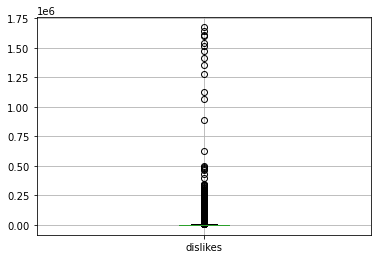

In [72]:
us_new.boxplot(column=['dislikes'])

-2402.0 4542.0
original size :  40949
new size :  38447  ->'dislikes'는 많이 받은 영상만 많이 받음.


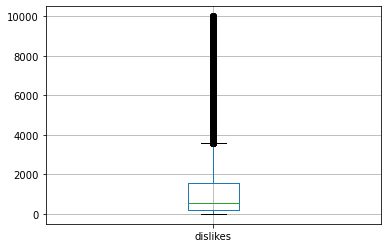

In [73]:
Q1 = us_new['dislikes'].quantile(0.25)
Q3 = us_new['dislikes'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (us_new['dislikes'] >= Q1 - 1.5 * IQR) & (us_new['dislikes'] <= Q3 + 1.5 *IQR)
print(Q1 - 1.5 * IQR,Q3 + 1.5 *IQR)

filter = (us_new['dislikes'] <= Q3 + 1.5 *IQR)
filter = (us_new['dislikes'] <= 10000)
us_new3 = us_new.loc[filter]
us_new3.boxplot(column=['dislikes'])

print("original size : ",len(us_new['likes']))
print("new size : ",len(us_new3['likes'])," ->'dislikes'는 많이 받은 영상만 많이 받음.")

### comment_count

<AxesSubplot:>

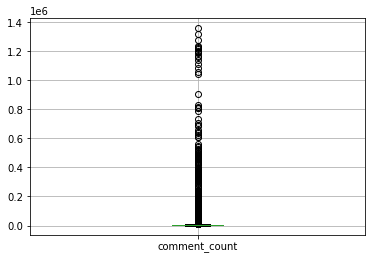

In [75]:
us_new.boxplot(column=['comment_count'])

-7097.5 13466.5
original size :  40949
new size :  36388  ->'comment_count'는 많이 받은 영상만 많이 받음.


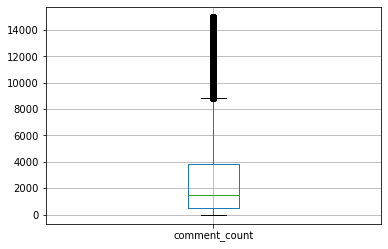

In [76]:
Q1 = us_new['comment_count'].quantile(0.25)
Q3 = us_new['comment_count'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (us_new['comment_count'] >= Q1 - 1.5 * IQR) & (us_new['comment_count'] <= Q3 + 1.5 *IQR)
print(Q1 - 1.5 * IQR,Q3 + 1.5 *IQR)

#filter = (us_new['comment_count'] <= Q3 + 1.5 *IQR)
filter = (us_new['comment_count'] <= 15000)
us_new4 = us_new.loc[filter]
us_new4.boxplot(column=['comment_count'])

print("original size : ",len(us_new['comment_count']))
print("new size : ",len(us_new4['comment_count'])," ->'comment_count'는 많이 받은 영상만 많이 받음.")

views, likes, dislikes, comment_count 모두 outlier에 해당되는 관측치 제외한 데이터 이용.

In [6]:
Q1 = us_new['views'].quantile(0.25)
Q3 = us_new['views'].quantile(0.75)
IQR = Q3 - Q1 

filter = (us_new['views'] <= Q3 + 1.5 *IQR) & (us_new['likes'] <= 550000) & (us_new['dislikes'] <= 10000) & (us_new['comment_count'] <= 15000)
filter2 = (us_new['views'] >0) & (us_new['likes'] >0) & (us_new['dislikes'] >0) & (us_new['comment_count'] >0)
my_us = us_new.loc[filter]
my_us = my_us.loc[filter2]

print("original size : ",len(us_new.iloc[:,]))
print("new size : ",len(my_us.iloc[:,]))

original size :  40949
new size :  33646


In [8]:
n = len(my_us.iloc[:,])
print(n)

33646


In [9]:
my_us.head(5)

,video_id,category_id,views,likes,dislikes,comment_count
1,1ZAPwfrtAFY,24,2418783,97185,6146,12703
2,5qpjK5DgCt4,23,3191434,146033,5339,8181
3,puqaWrEC7tY,24,343168,10172,666,2146
5,gHZ1Qz0KiKM,28,119180,9763,511,1434
6,39idVpFF7NQ,24,2103417,15993,2445,1970


In [10]:
us_new = usvideos.loc[filter]
us_new.shape

(34472, 16)

In [9]:
us_new.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...


# 3. views, likes, dislikes, comment_count 사이 관계

## 3-1. 다항회귀
 views, likes 사이 관계

In [82]:
X = pd.DataFrame(my_us['views'])
y = pd.DataFrame(my_us['likes'])

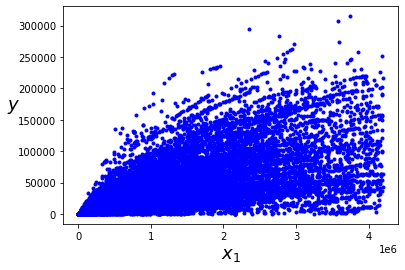

In [83]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [84]:

X = np.log(X)
y = np.log(y)

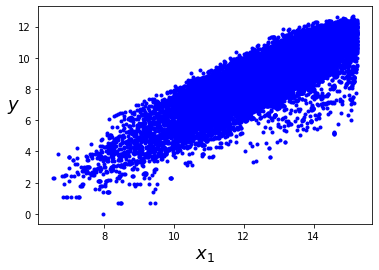

In [85]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [86]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
#print('X[0] :', X[0])
#print('X_poly[0] :', X_poly[0])

In [87]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [88]:
lin_reg.intercept_, lin_reg.coef_

(array([-10.78953674]), array([[ 2.10834771, -0.04285754]]))

최종적으로 예측된 모델은 다음과 같다. (log transformation 반영)

$$
exp^y = exp^{-0.042 x^2 + 2.108 x - 10.789}
$$
                                                               
즉, $$ y = -0.042 x^2 + 2.108 x - 10.789 $$

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)


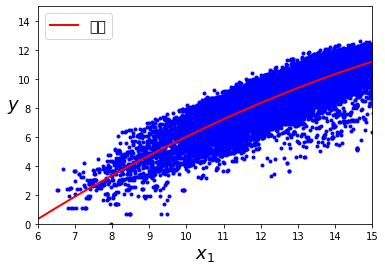

In [89]:

X_new=np.linspace(0, 15, 35000).reshape(35000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([6, 15, 0, 15])
plt.show()

### train set, test set으로 나눠서 설명

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25234, 1) (8412, 1) (25234, 1) (8412, 1)


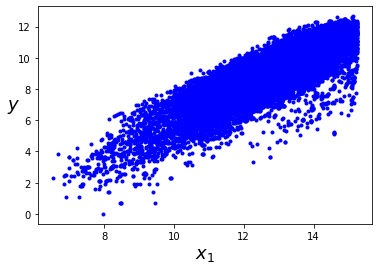

In [91]:
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [92]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
#print('X[0] :', X[0])
#print('X_poly[0] :', X_poly[0])

In [93]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [94]:
lin_reg.intercept_, lin_reg.coef_

(array([-10.72894491]), array([[ 2.10055068, -0.04261066]]))

최종적으로 예측된 모델은 다음과 같다. (log transformation 반영)

$$
exp^y = exp^{-0.043 x^2 + 2.101 x - 10.789}
$$
즉,
$$ y = -0.043 x^2 + 2.101 x - 10.789 $$

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)


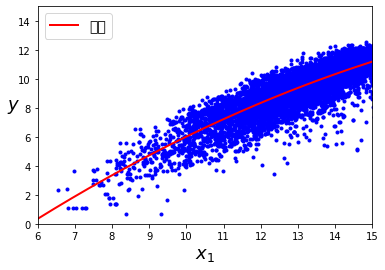

In [95]:

X_new=np.linspace(0, 15, 35000).reshape(35000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_test, y_test, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([6, 15, 0, 15])
plt.show()

## 3-2. NonLinear SVM Classification
likes, dislikes, comment_count 사이 관계

실제 데이터셋은 위에서 살펴본 Linear SVM으로 분류할 수 없는 즉, 선형적으로 분류할 수 없는 비선형 적인 데이터셋이 많다.

이러한, 비선형 데이터셋을 다루는 한 가지 방법은 다항 특성(polynomial features)과 같은 특성을 추가하는 방법이 있다.

이번엔 likesd와 dislikes를 통해 사람들이 직접 comment를 다는 횟수를 살펴보자.
여기서 comment_count가 이상값, 즉 IQR 밖의 점들을 comment가 많다고 판단하며,
likes와 dislikes로 이를 분류할 수 있는지 살펴보도록 한다.

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [97]:
X = pd.DataFrame(my_us[['likes','dislikes']])

Q1 = my_us['comment_count'].quantile(0.25)
Q3 = my_us['comment_count'].quantile(0.75)
IQR = Q3 - Q1
y = my_us['comment_count'] > Q3+1.5*IQR

print(X.shape, y.shape)

(33646, 2) (33646,)


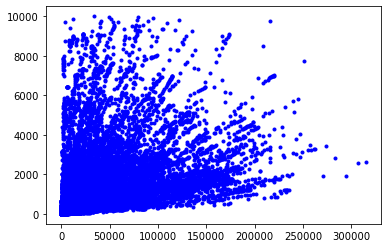

In [98]:
plt.plot(X.iloc[:,0], X.iloc[:,1], "b.")
plt.show()

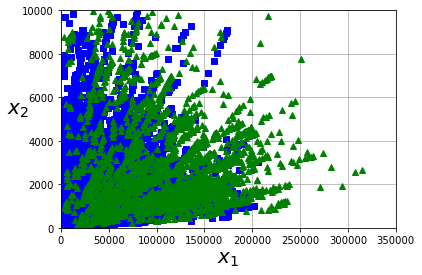

In [99]:
def plot_dataset(X, y, axes):
    plt.plot(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], "bs")
    plt.plot(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-0.5, 350000, -0.5, 10000])
plt.show()

분명 분류할 수 있을 것 같은데 명확하게 나뉘지 않는다. 데이터를 조정해보자.

In [100]:
X = np.log(X)
y = y

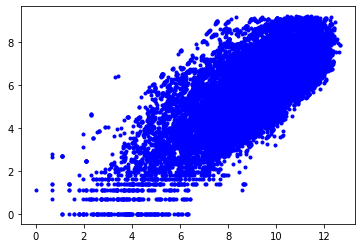

In [102]:
plt.plot(X.iloc[:,0], X.iloc[:,1], "b.")
plt.show()

다항 특성을 추가하는 PolynomialFeatures와 StandardScaler 그리고 LinearSVC를 Pipeline을 이용해 분류기를 만들어 보자

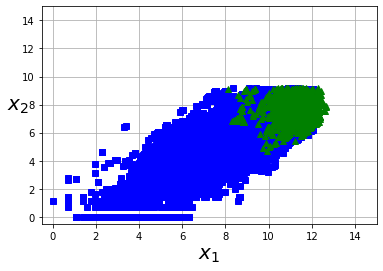

In [103]:
def plot_dataset(X, y, axes):
    plt.plot(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], "bs")
    plt.plot(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-0.5, 15, -0.5, 15])
plt.show()

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [111]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))
])

polynomial_svm_clf.fit(X, y)

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

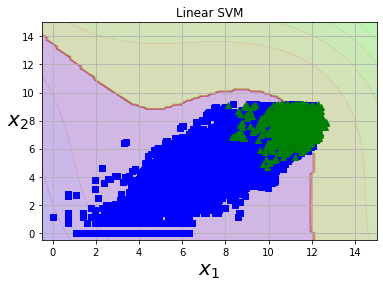

In [112]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-0.5, 15, -0.5, 15])
plot_dataset(X, y, [-0.5, 15, -0.5, 15])
plt.title('Linear SVM')
plt.show()

likes와 dislikes를 통해 comment_count를 분류할 수 있는 모델을 만들었다!

# 4. trending_date, publish_time, views 사이 관계

In [11]:
data=us_new.loc[:,us_new.columns.isin(['video_id','views','trending_date','publish_time'])]

In [12]:
data=pd.DataFrame(data)
data

,video_id,trending_date,publish_time,views
1,1ZAPwfrtAFY,17.14.11,2017-11-13T07:30:00.000Z,2418783
2,5qpjK5DgCt4,17.14.11,2017-11-12T19:05:24.000Z,3191434
3,puqaWrEC7tY,17.14.11,2017-11-13T11:00:04.000Z,343168
5,gHZ1Qz0KiKM,17.14.11,2017-11-13T19:07:23.000Z,119180
6,39idVpFF7NQ,17.14.11,2017-11-12T05:37:17.000Z,2103417
...,...,...,...,...
40933,Gs26bZTRkdU,18.14.06,2018-05-20T21:00:00.000Z,979732
40936,Xr2rgT9uEnA,18.14.06,2018-05-20T18:00:02.000Z,3229540
40944,BZt0qjTWNhw,18.14.06,2018-05-18T13:00:04.000Z,1685609
40945,1h7KV2sjUWY,18.14.06,2018-05-18T01:00:06.000Z,1064798


In [13]:
data['trending_date'] = pd.to_datetime(data['trending_date'],format="%y.%d.%m")
data['trending_date']

1       2017-11-14
2       2017-11-14
3       2017-11-14
5       2017-11-14
6       2017-11-14
           ...    
40933   2018-06-14
40936   2018-06-14
40944   2018-06-14
40945   2018-06-14
40946   2018-06-14
Name: trending_date, Length: 34472, dtype: datetime64[ns]

In [14]:
data['t_year'] = data['trending_date'].dt.year
data['t_month'] = data['trending_date'].dt.month
data['t_day'] = data['trending_date'].dt.day

In [15]:
pd.value_counts(data['t_month']) 

12    5686
3     5406
1     5260
2     5010
5     4452
4     3833
11    3138
6     1687
Name: t_month, dtype: int64

12월에 가장 많은 trending video가 있었다는 걸 알 수 있다. 

In [16]:
data['publish_time'] = data['publish_time'].astype('datetime64')
data['publish_time']

1       2017-11-13 07:30:00
2       2017-11-12 19:05:24
3       2017-11-13 11:00:04
5       2017-11-13 19:07:23
6       2017-11-12 05:37:17
                ...        
40933   2018-05-20 21:00:00
40936   2018-05-20 18:00:02
40944   2018-05-18 13:00:04
40945   2018-05-18 01:00:06
40946   2018-05-18 17:34:22
Name: publish_time, Length: 34472, dtype: datetime64[ns]

In [17]:
data['p_year'] = data['publish_time'].dt.year
data['p_month'] = data['publish_time'].dt.month
data['p_day'] = data['publish_time'].dt.day

data['p_ymd'] = data["publish_time"].apply(lambda x: x.strftime('%d%m%Y'))
data['p_ymd'] = pd.to_datetime(data['p_ymd'], format='%d%m%Y')

In [18]:
data['p_ymd']

1       2017-11-13
2       2017-11-12
3       2017-11-13
5       2017-11-13
6       2017-11-12
           ...    
40933   2018-05-20
40936   2018-05-20
40944   2018-05-18
40945   2018-05-18
40946   2018-05-18
Name: p_ymd, Length: 34472, dtype: datetime64[ns]

In [19]:
pd.value_counts(data['p_month'])

12    5625
2     5544
3     5326
1     5001
5     4562
11    3882
4     3881
6      519
10      62
9       34
8       26
7       10
Name: p_month, dtype: int64

5월에 publish된 영상이 가장 많이 trending video에 있었다는 걸 알 수 있다.

### trending month와 published month이 views에 영향을 미치지 않을까 싶어서 확인해보기로 했다. 

In [19]:
data[['t_month', 'p_month', 'views']].corr()

,t_month,p_month,views
t_month,1.000000,0.898382,-0.059468
p_month,0.898382,1.000000,-0.078835
views,-0.059468,-0.078835,1.000000


그러나 trending month와 published month는 views와 상관관계가 작게 나타난다. 

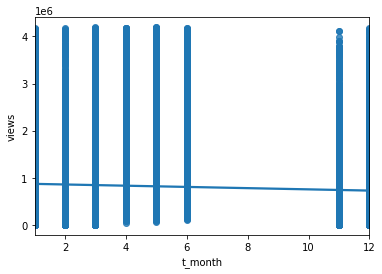

In [21]:
ax = plt.subplots() 
ax = sns.regplot(x=data["t_month"], y=data["views"])

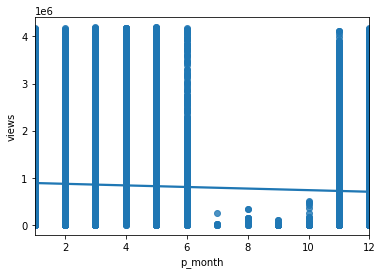

In [22]:
ax = plt.subplots() 
ax = sns.regplot(x=data["p_month"], y=data["views"])

trending month나 published month 모두 views가 작은 값부터 큰값까지 넓게 분포해있어서 회귀로 예측하는 것은 적절하지 않다. 

그럼에도 한번 돌려보기로 했다.

In [24]:
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(data[["t_month","p_month"]])
y = pd.DataFrame(data['views'])

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [104]:
lin_reg.intercept_, lin_reg.coef_

(array([900805.44825789]), array([[ 12821.80128381, -28091.25633406]]))

최종적으로 예측된 모델은 다음과 같다. 

$$ y = 900805.448 + 12821.801 x_1 - 28091.256 x_2 $$

In [26]:
y_new=lin_reg.predict(X)

In [27]:
from sklearn.metrics import mean_squared_error
print('Mean_Squared_Error = ', mean_squared_error(y_new, y))

Mean_Squared_Error =  745273409647.9365


MSE 값이 굉장히 크게 나온다! 

즉 위에서 상관계수를 확인하여 알 수 있었듯, published month나 trending month는 views에 큰 영향을 미치지 않는다는 것을 확인할 수 있다. 

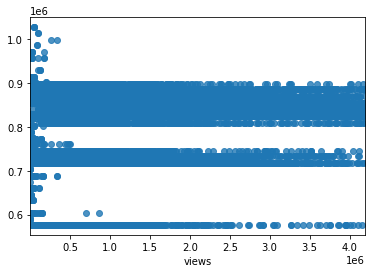

In [28]:
ax = plt.subplots() 
ax = sns.regplot(x=y, y=y_new)

예측된 views 값이 특정 값들에만 모여있는 것을 확인할 수 있다.  

### publish부터 trending까지 얼마나 걸렸는지, trending이 얼마나 지속되었는지가 views에 영향을 미칠 것이라고 생각하여 확인해보기로 했다. 

In [29]:
by_video=data.groupby(["video_id"])

In [30]:
mintrend=by_video.trending_date.min()

In [31]:
mintrend

video_id
-0CMnp02rNY   2018-06-06
-0NYY8cqdiQ   2018-02-01
-1Hm41N0dUs   2018-04-29
-1yT-K3c6YI   2017-11-29
-2RVw2_QyxQ   2017-11-14
                 ...    
zvjqcoiOPbE   2018-01-06
zwEn-ambXLw   2018-03-26
zxUwbflE1SY   2017-11-15
zy0b9e40tK8   2017-11-14
zzQsGL_F9_c   2018-02-05
Name: trending_date, Length: 5952, dtype: datetime64[ns]

In [32]:
publish=by_video.p_ymd.min()

In [33]:
publish

video_id
-0CMnp02rNY   2018-06-04
-0NYY8cqdiQ   2018-01-29
-1Hm41N0dUs   2018-04-27
-1yT-K3c6YI   2017-11-28
-2RVw2_QyxQ   2017-11-12
                 ...    
zvjqcoiOPbE   2018-01-05
zwEn-ambXLw   2018-03-22
zxUwbflE1SY   2017-11-13
zy0b9e40tK8   2017-11-09
zzQsGL_F9_c   2018-01-30
Name: p_ymd, Length: 5952, dtype: datetime64[ns]

In [34]:
period=mintrend-publish
period=period.dt.days
period.describe()

count    5952.000000
mean       23.898858
std       216.818285
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max      4215.000000
dtype: float64

publish부터 trending이 된 날까지 걸린 기간

In [35]:
maxview=by_video.views.max()
maxview

video_id
-0CMnp02rNY     800359
-0NYY8cqdiQ     563746
-1Hm41N0dUs    2058516
-1yT-K3c6YI     231341
-2RVw2_QyxQ      71089
                ...   
zvjqcoiOPbE    1329689
zwEn-ambXLw     241668
zxUwbflE1SY     225280
zy0b9e40tK8     378750
zzQsGL_F9_c     199041
Name: views, Length: 5952, dtype: int64

한 영상에서 view가 가장 많은 경우를 maxview에 저장

In [38]:
pmdata=pd.DataFrame({"period":period,"maxview":maxview})

In [39]:
pmdata[['period','maxview']].corr()

,period,maxview
period,1.000000,-0.080226
maxview,-0.080226,1.000000


publish부터 trending까지 걸린 시간은 views와 큰 상관관계가 없다. 

In [43]:
maxtrend=by_video.trending_date.max()

In [44]:
trend=maxtrend-mintrend
trend

video_id
-0CMnp02rNY    5 days
-0NYY8cqdiQ    0 days
-1Hm41N0dUs    2 days
-1yT-K3c6YI    3 days
-2RVw2_QyxQ    2 days
                ...  
zvjqcoiOPbE    6 days
zwEn-ambXLw   11 days
zxUwbflE1SY    4 days
zy0b9e40tK8    0 days
zzQsGL_F9_c    1 days
Name: trending_date, Length: 5952, dtype: timedelta64[ns]

trending video에 있었던 기간을 trend에 저장

In [45]:
trenddata=pd.DataFrame({"trend":trend.dt.days,"maxview":maxview})

In [46]:
trenddata[['trend','maxview']].corr()

,trend,maxview
trend,1.000000,0.204044
maxview,0.204044,1.000000


앞의 경우보다 상관관계가 크게 나왔다! 

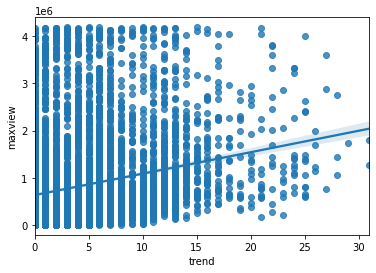

In [52]:
ax = plt.subplots() 
ax = sns.regplot(x=trenddata["trend"], y=trenddata["maxview"])

앞의 경우와 마찬가지로 trend가 지속된 기간과 무관하게 views가 작은 값부터 큰값까지 분포해있다.

In [54]:
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(trenddata["trend"])
y = pd.DataFrame(trenddata['maxview'])

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [55]:
lin_reg.intercept_, lin_reg.coef_

(array([632662.50543194]), array([[45485.29009589]]))

최종적으로 예측된 모델은 다음과 같다. 

$$ y = 632662.505 + 45485.290x $$

In [56]:
y_new=lin_reg.predict(X)

In [57]:
from sklearn.metrics import mean_squared_error
print('Mean_Squared_Error = ', mean_squared_error(y_new, y))

Mean_Squared_Error =  984086407885.3834


MSE가 크다. 

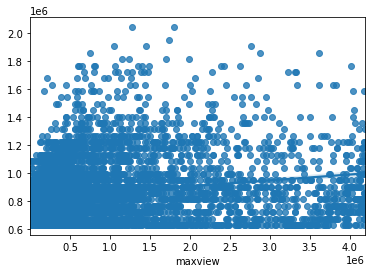

In [58]:
ax = plt.subplots() 
ax = sns.regplot(x=y, y=y_new)

대부분 값이 작게 예측되었다. 

# 5. 변수들 사이 상관관계

In [95]:
string=usvideos['title']
lower = []
upper = []
upper_rate = []
for j in range(len(string)):
    count1=0
    count2=0
    for i in string[j]:
        if(i.islower()):
            count1 += 1
        elif(i.isupper()):
            count2 += 1

    lower.append(count1)
    upper.append(count2)
    temp = (count2+1) / (count1+count2+1)
    upper_rate.append(temp)

In [96]:
usvideos["upper_rate"]=upper_rate

In [97]:
corr_matrix = usvideos.corr()
corr_matrix["views"].sort_values(ascending=False)

views                     1.000000
likes                     0.849177
comment_count             0.617621
dislikes                  0.472213
ratings_disabled          0.015355
comments_disabled         0.002677
video_error_or_removed   -0.002256
upper_rate               -0.004337
category_id              -0.168231
Name: views, dtype: float64

<AxesSubplot:xlabel='views', ylabel='upper_rate'>

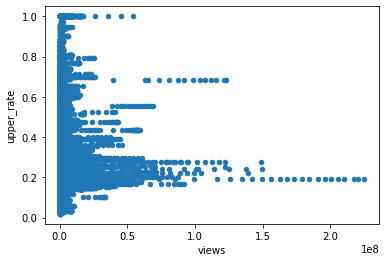

In [98]:

from pandas.plotting import scatter_matrix

usvideos.plot(kind="scatter", x="views", y="upper_rate")

In [99]:
usvideos['likes/views'] = usvideos['likes']/usvideos['views']
usvideos['dislikes/views'] = usvideos['dislikes']/usvideos['views']
usvideos['comments/views'] = usvideos['comment_count']/usvideos['views']

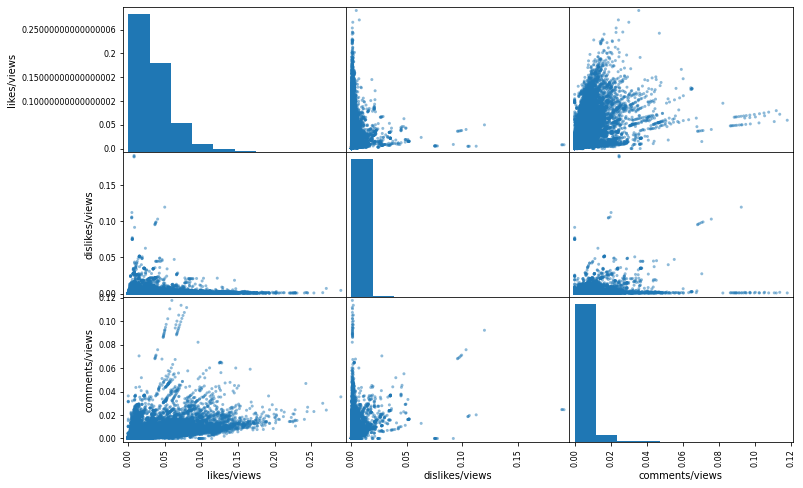

In [100]:
from pandas.plotting import scatter_matrix

attributes = ['likes/views', 'dislikes/views', 'comments/views']
scatter_matrix(usvideos[attributes], figsize=(12, 8));

In [101]:

corr_matrix = usvideos.corr()
corr_matrix["comments/views"].sort_values(ascending=False)

comments/views            1.000000
likes/views               0.427980
dislikes/views            0.284316
comment_count             0.247241
upper_rate                0.167733
dislikes                  0.089142
category_id               0.080174
likes                     0.070496
video_error_or_removed   -0.001944
ratings_disabled         -0.029261
views                    -0.048708
comments_disabled        -0.097271
Name: comments/views, dtype: float64